In [22]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LSTM

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)




Tensorflow version: 2.14.0


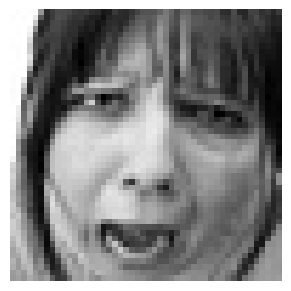

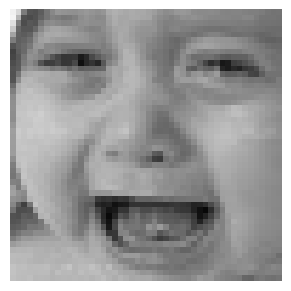

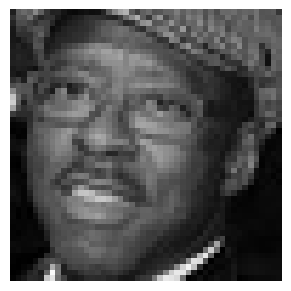

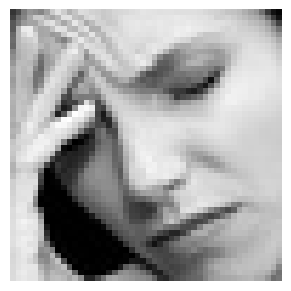

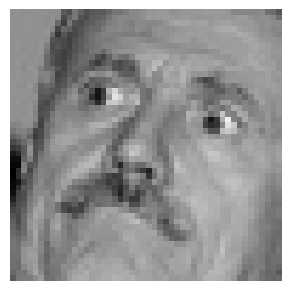

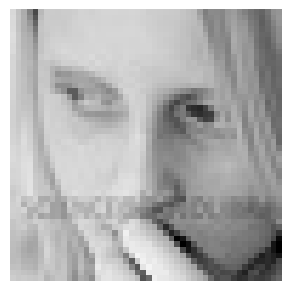

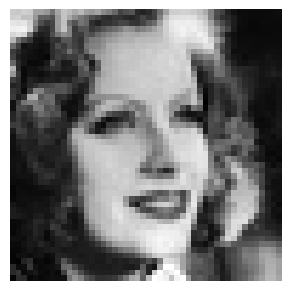

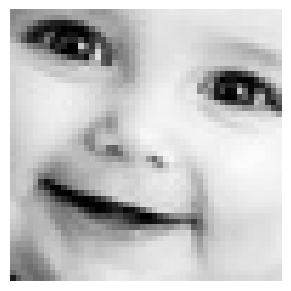

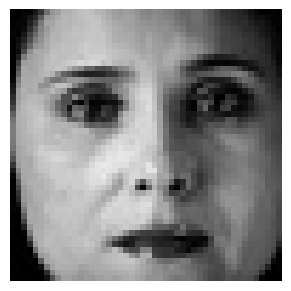

In [23]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [33]:
img_size =48
batch_size= 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/" ,
                                                   target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size =batch_size,
                                                    class_mode = "categorical" ,
                                                    shuffle =True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)
                                                    

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [34]:
from keras.layers import Reshape
from tensorflow.keras.regularizers import l2
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, kernel_regularizer=l2(0.001),padding = "same")(input_tensor)
    # x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    
    
    return x
    
def Dense_f(input_tensor, nodes):
    x = Dense(nodes , activation ='relu')(input_tensor)
    # x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x
    
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(3,3))
    conv_3 = Convolution(conv_2,128,(3,3))
    conv_4 = Convolution(conv_3,256,(3,3))
    flatten = Flatten()(conv_4)
    
    # reshape = Reshape((1, -1))(flatten)  
    # print(flatten.shape)
    # lstm_1 = LSTM(units=512 , return_sequences =True)(reshape)
    # lstm_2 = LSTM(units= 128 , return_sequences =False)(lstm_1)
    
    dense_1 = Dense_f(flatten,128)
    # dense_2 =Dense_f(dense_1,7)

    output  = Dense(7, activation="softmax")(dense_1)  # Apply softmax activation here

    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

    return model


model = model_fer((48,48,1))
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 dropout_33 (Dropout)        (None, 48, 48, 32)        0         
                                                                 
 activation_33 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 64)        18496     
                                                           

In [35]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weight.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [36]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 2.2547 - accuracy: 0.2831
Epoch 1: saving model to model_weight.h5
448/448 [==============================] - 244s 536ms/step - loss: 2.2547 - accuracy: 0.2831 - val_loss: 1.8266 - val_accuracy: 0.3871
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.7635 - accuracy: 0.3802
Epoch 2: saving model to model_weight.h5
448/448 [==============================] - 222s 496ms/step - loss: 1.7635 - accuracy: 0.3802 - val_loss: 1.6397 - val_accuracy: 0.4347
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.6390 - accuracy: 0.4270
Epoch 3: saving model to model_weight.h5
448/448 [==============================] - 173s 386ms/step - loss: 1.6390 - accuracy: 0.4270 - val_loss: 1.5391 - val_accuracy: 0.4679
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.5462 - accuracy: 0.4633
Epoch 4: saving model to model_weight.h5
448/448 [==============================] - 162s

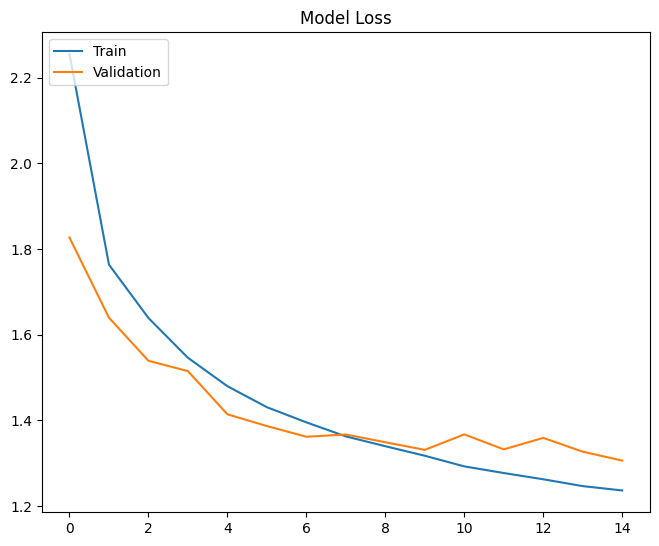

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

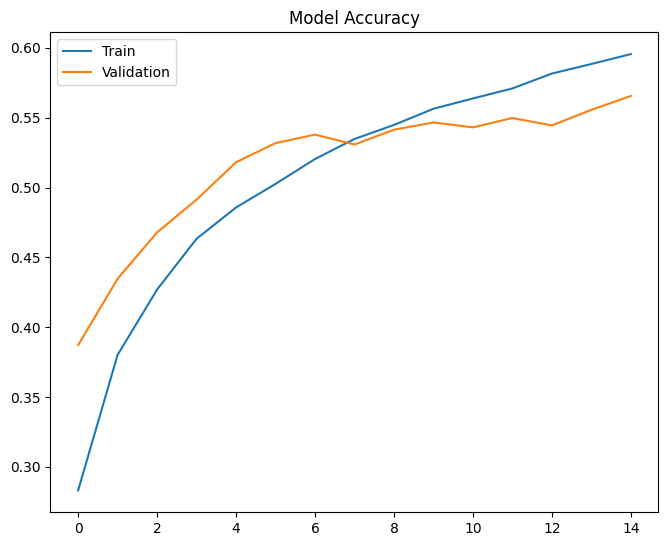

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [39]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)